<a href="https://colab.research.google.com/github/ktardthong/DSE_g19/blob/master/KT%20-%20VGSale_HW_Week_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kantatorn Tardthong
**DSEs_G19**

การบ้านของ WK1

11/08/2020


# 0. ตั้งจุดประสงค์ของการวิเคราะห์ข้อมูล
1.เพื่อดูการเติบโตของยอดขายเกมตามแต่ละโซน

2.แบ่งกลุ่มของเครื่องเกมตามโซน


3.เปรียบเทียบยอดขายของเกมแต่ละช่วงปี


# 1. การเก็บข้อมูล
ข้อมูลที่นำมาวิเคราะห์เป็นข้อมูลที่มีการถูกเก็บรวบรวมข้อมูลไว้แล้วบนเว็บไซต์ Kaggle ([Kaggle/Video Game Sale](https://www.kaggle.com/gregorut/videogamesales)) โดยประกอบด้วยตัวแปรดังนี้

1.**Rank** อันดับยอดขายรวม

2.**Name** ชื่อเกม

3.**Platform** เครื่องเกมที่รองรับเกมที่วางจำหน่าย

4.**Year** ปีที่วางจำหน่าย

5.**Genre** ประเภทของเกม

6.**Publisher** ผู้จัดจำหน่าย

7.**NA_Sales** ยอดขายในโซนอเมริกาเหนือ (หน่วย:ล้าน)

8.**EU_Sales** ยอดขายในยุโรป (หน่วย:ล้าน)

9.**JP_Sales** ยอดขายในญี่ปุ่น (หน่วย:ล้าน)

10.**Other_Sales** ยอดขายที่อื่นๆ (หน่วย:ล้าน)

11.**Global_Sales** ยอดขายทั่วโลก

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# เอามาจาก vgsales_v1.xlsx
# ทำลิงค์จากการที่เปลี่ยน excel เป็น google sheet แล้ว save เป็น csv
csv_file='https://docs.google.com/spreadsheets/d/e/2PACX-1vQVOTiDcZklED6H52iS4Q4M806K6DdO1lqMIDD-9l5eXdG5V8ClBPPQwxoQoZsgqMpBPGHDBTm5Yqmt/pub?gid=1441172676&single=true&output=csv'
data = pd.read_csv(csv_file)

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#ดูว่ามี column อะไรบ้าง
# น่าสนใจที่ Year นั้นเป็น float64 เช่น 2006.0 หรือ 2009.0 เดี๋ยวจะเปลี่ยนให้เป็น int64 เพื่อความเรียบร้อย
data.info()

# ใช้describe เพื่อทำ basic stat
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
#ลองเปลี่ยน data type ของ Year ให้เป็น int
data['Year'] = data['Year'].astype('int64')
data.head()

ValueError: ignored

In [ ]:
#จะเห็นว่าพังงงง อ้าาาววทำไมหล่ะ จาก error ข้างบนมันบอกว่า "Cannot convert non-finite values (NA or inf) to integer"
#แสดงว่ามีสิ่งแปลกปลอมอยู่ในนี้ เราจะมาลอง unique กันก่อนว่ามีค่าอะไรบ้าง
data['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [ ]:
#คราวนี้มาหาว่าอะไรที่เป็น NaN มั่ง
data[data['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [ ]:
# - -! ยังไม่รู้ว่าทำอะไรอะไรกับ NaN เหล่านี้แต่จับแยกกับ Year ที่มีค่าก่อน
#จับแยกครับบบ
data = data[data['Year'].notnull()]           #เอาที่ Year ไม่ null จ้าา
data_year_null = data[data['Year'].isnull()]  #เก็บไว้ก่อนเดี๋ยวค่อยว่ากันอีกที

In [ ]:
#ลองมาเปลี่ยนกันอีกทีครับ
data['Year'] = data['Year'].astype('int64')
data.info()

#อยากรู้ว่าค่า stat ใน describe จะมีอะไรเปลี่ยนไหมน้าาาา
data.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## **สรุปตรงนี่้ก่อนไปต่อ** 


---


สิ่งที่เราทำไปคือ...

1.   ตอนที่ได้รับไฟล์มาเรานำไปใส่บน drive แล้วทำเป็นลิงค์ออกมาเพื่อที่ให้ pandas อ่านได้จาก url เลย
2.   เราลองดูค่าคร่าวๆก่อนว่ามีอะไรมั่ง เตะตาที่ column year ที่ตอนแรกเป็น float64 เราเลยอยากลองเปลี่ยนเป็น int64 แต่พอลองเปลี่ยนแล้วมันพังเลยเข้าไปดูว่าทำไม เราก็เลยเห็นว่ามันมี null อยู่
3. เราจับแยกค่าที่ Year เป็น Null ออกจากที่ไม่เป็น Null แล้วเปลี่ยน data type เป็น int64 โดยที่ไม่มีปัญหาอะไร ส่วนอีกก้อนเก็บไว้ก่อนเดี๋ยวค่อยมาดูใหม่ว่าจะใช้ไหม
4. เราลองมาเช็คผลดูในคำสั่ง describe() ว่ามีอะไรเปลี่ยนไหมและเปลี่ยนมากไหม ค่า Mean เปลี่ยนเล็กน้อยจากการที่เราเอา ข้อมูลที่เป็น NULL 271ข้อมูลออก




# 2. การตั้งคำถาม ตั้งสมมติฐาน ตั้งเป้าหมายของการวิเคราะห์
2.1 ตั้งคำถาม


1.   หากมีร้านขายแผ่นเกมของตัวเอง ควรเอาเกมใดมาขายดี
2.   ผู้เล่นในแต่ละโซนชอบเกมแนวไหน

1.   เกมภาคต่อสามารถสร้างรายได้ ได้ต่อเนื่องหรือยิ่งทำยิ่งขาดทุน





2.2 ตั้งสมมติฐาน

จะมีคนในโซนญี่ปุ่น Role-Playing (RPG) มากที่สุด
ยอดขายเกมของโซนญี่ปุ่นจะมีประมาณ 20% ของยอดขายทั่วโลก
เกมที่จำหน่ายโดย Nintendo จะมียอดขายสูงกว่าเกมที่จำหน่ายโดยผู้จัดจำหน่ายรายอื่นๆ

2.3. ตั้งเป้าหมาย

  เพื่อหาแนวเกมที่สามารถทำยอดขายได้ดีที่สุดในแต่ละโซน


#3. การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart)
- เพื่อการวิเคราะห์เราต้องมีการจัดข้อมูลให้เหมาะสมสำหรับการนำมาวิเคราะห์

#3.1 ข้อมูล Platform





In [97]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [88]:
#เราอยากได้ค่า Name (ชื่อของเกมส์) และ Global Sales เพื่อตอบคำถาม "หากมีร้านขายแผ่นเกมของตัวเอง ควรเอาเกมใดมาขายดี"
#เมื่อได้ค่ามาเราก็จะทำการดูยอด Glbale_sales ว่าได้เท่าไหร่มั่ง โดยการ sum 
#ผมทำการ order จากมากไปน้อยด้วย ascending=False

data.groupby(['Name','Platform'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)

,Name,Platform,Global_Sales
15673,Wii Sports,Wii,82.74
13156,Super Mario Bros.,NES,40.24
7805,Mario Kart Wii,Wii,35.82
15675,Wii Sports Resort,Wii,33.00
10339,Pokemon Red/Pokemon Blue,GB,31.37
...,...,...,...
4805,G1 Jockey 4 2008,PS3,0.01
11400,Rozen Maiden: Gebetgarten,PS2,0.01
7681,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,0.01
7181,Legoland,PC,0.01


In [ ]:
#แต่เดี๋ยวก่อน จะเห็นว่า sum อย่างนี้คงไม่ดีเพราะว่าเกมส์นี้ มีในสอง Platform!
data[data["Name"].isin(['Super Mario Bros.'])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
200,201,Super Mario Bros.,GB,1999,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07


# จากคำถามว่า **หากมีร้านขายแผ่นเกมของตัวเอง ควรเอาเกมใดมาขายดี**


In [173]:
#ดังนั้นขอไม่มอง Platform แล้วนะ!
#เราจะเห็นได้จากด้านล่างว่า Super Mario Bros. เนี่ยรวม sales กันแล้ว 40.24 + 5.07 = 45.31
#หวังว่าจะไม่มีชื่อเดียวกันใน publisher อื่นๆนะ แต่เนื่องว่าถามว่าเกมส์อะไร ก็ขอตอบอันนี้แล้วกันครับ
best_selling_games = data.groupby(['Name'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False).head(20)

best_selling_games.head(10)

,Name,Global_Sales
10883,Wii Sports,82.74
3664,Grand Theft Auto V,55.92
9229,Super Mario Bros.,45.31
9611,Tetris,35.84
5508,Mario Kart Wii,35.82
10885,Wii Sports Resort,33.00
7266,Pokemon Red/Pokemon Blue,31.37
1212,Call of Duty: Modern Warfare 3,30.83
6648,New Super Mario Bros.,30.01
1208,Call of Duty: Black Ops II,29.72


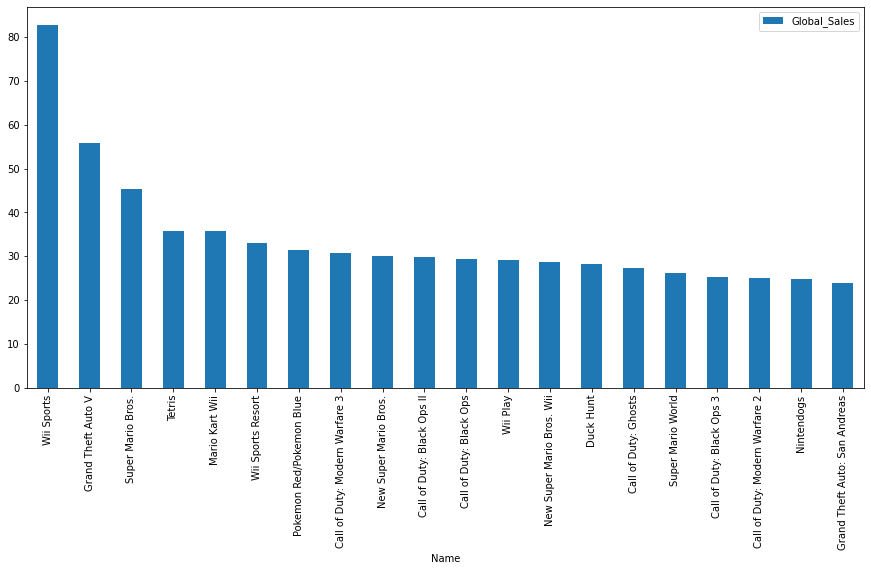

In [210]:
best_selling_games.groupby(['Name'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False).plot(figsize=(15,7),kind='bar',x='Name')

# แล้วถ้าถามว่า **Platform ไหนดี**

In [98]:
data.head()
#ดังนั้นขอไม่มอง Platform แล้วนะ!
#เราจะเห็นได้จากด้านล่างว่า Super Mario Bros. เนี่ยรวม sales กันแล้ว 40.24 + 5.07 = 45.31
#หวังว่าจะไม่มีชื่อเดียวกันใน publisher อื่นๆนะ แต่เนื่องว่าถามว่าเกมส์อะไร ก็ขอตอบอันนี้แล้วกันครับ
best_selling_platform = data.groupby(['Platform'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)

best_selling_platform.head(10)

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.61
17,PS3,949.35
26,Wii,909.81
4,DS,818.96
15,PS,727.39
6,GBA,313.56
19,PSP,291.71
18,PS4,278.10
13,PC,255.05


In [99]:
#ขอบคูณทีมที่กรุปมานะครับ :)

dataPlat = dataPlat.replace([['PS2','PS3','PSP','PSV','PS4']],'PS')
dataPlat = dataPlat.replace([['DS','Wii','3DS','N64','WiiU','NES','GBA','GB']],'NINTENDO')
dataPlat = dataPlat.replace([['X360','XB','XOne']],'XBOX')
dataPlat = dataPlat.replace([['GC','SNES','SAT','2600','DC','GEN','NG','SCD','WS','3DO','TG16','PCFX','GG']],'OTHER')
dataPlat['Platform'].value_counts()

PS          6565
NINTENDO    5388
XBOX        2251
OTHER       1180
PC           943
Name: Platform, dtype: int64

In [105]:
#ผมเพิ่มอีกหนึ่ง column ใน Data ชื่อว่า Plat
data['Plat'] = dataPlat
data.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Plat
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01,NINTENDO
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01,OTHER
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01,PS
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01,NINTENDO
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01,NINTENDO


In [131]:
best_selling_platform = data.groupby(['Plat'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
best_selling_platform.head()

,Plat,Global_Sales
3,PS,3541.64
0,NINTENDO,3094.17
4,XBOX,1362.76
1,OTHER,566.74
2,PC,255.05


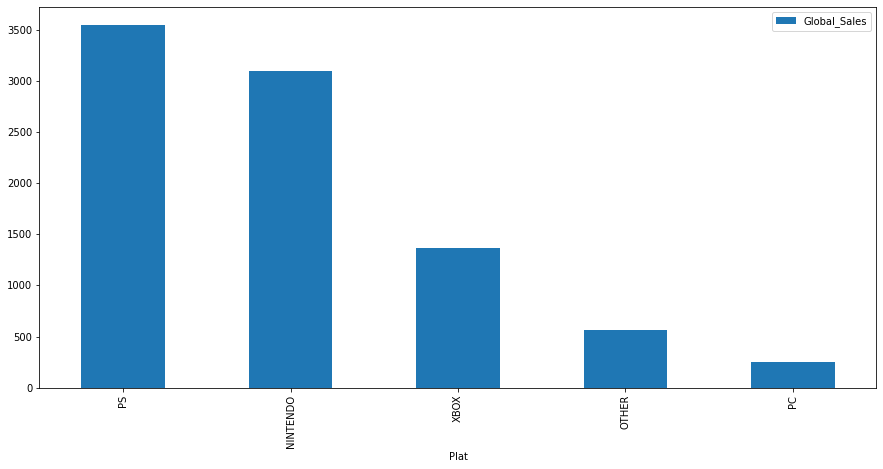

In [209]:
data.groupby(['Plat'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False).plot(figsize=(15,7),kind='bar',x='Plat')


# สรุปเรื่อง Platform


# 3.2 ข้อมูลปีที่จำหน่าย

In [ ]:
data.head()

NameError: ignored

# สรุปข้อมูลปีที่จำหน่าย

# 3.3 ข้อมูลประเภทของเกม

# สรุปข้อมูลประเภทของเกม

# 3.4 ข้อมูลผู้จัดจำหน่าย

# สรุปข้อมูลผู้จัดจำหน่าย